# K-means Cluttering + RFM Model

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [561]:
df_data = pd.read_csv('telco_data.csv')

In [563]:
df_data['Customer ID'].value_counts().count()

7043

In [565]:
df_data.duplicated().sum()

0

There are total 7043 distinct customers in the dataset, and has no duplicates

In [568]:
# Create a new column 'Monthly Payment', filled value=1
df_data['Monthly Payment'] = 1

In [570]:
df_data = df_data.loc[:,['Monthly Payment','Tenure in Months','Monthly Charge']]

In [578]:
df_data.head()

,Monthly Payment,Tenure in Months,Monthly Charge
0,1,1,39.65
1,1,8,80.65
2,1,18,95.45
3,1,25,98.50
4,1,37,76.50


In [582]:
df_rfm = pd.DataFrame(df_data)

## Elbow Method

The Elbow Method helps find out the most appropriate K number of clusters

In [588]:
df_rfm.describe()

,Monthly Payment,Tenure in Months,Monthly Charge
count,7043.0,7043.000000,7043.000000
mean,1.0,32.386767,64.761692
std,0.0,24.542061,30.090047
min,1.0,1.000000,18.250000
25%,1.0,9.000000,35.500000
50%,1.0,29.000000,70.350000
75%,1.0,55.000000,89.850000
max,1.0,72.000000,118.750000


Since 'Tenure in Months','Monthly Charge' have different value ranges so I will scale these features between 0 and 1

In [590]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm = scaler.fit_transform(df_rfm[df_rfm.columns])

In [600]:
pd.DataFrame(df_rfm).head()

,0,1,2
0,0.0,-1.278988,-0.834611
1,0.0,-0.993743,0.528063
2,0.0,-0.586250,1.019955
3,0.0,-0.301005,1.121324
4,0.0,0.187986,0.390134


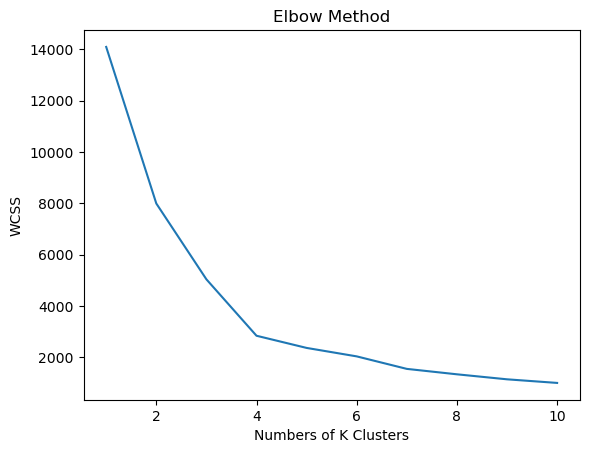

In [602]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_rfm)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of K Clusters')
plt.ylabel('WCSS');

There is a small change in the WCSS curve when K=4. Therefore, the most appropriate K values is 4 and I will divide the dataset into 4 clusters

In [605]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_rfm)

KMeans(n_clusters=4, random_state=42)

In [623]:
df_data['Cluster'] = model.labels_ + 1
df_data.head()

,Monthly Payment,Tenure in Months,Monthly Charge,Cluster
0,1,1,39.65,1
1,1,8,80.65,4
2,1,18,95.45,4
3,1,25,98.50,4
4,1,37,76.50,4


## Ploting 4 Clusters

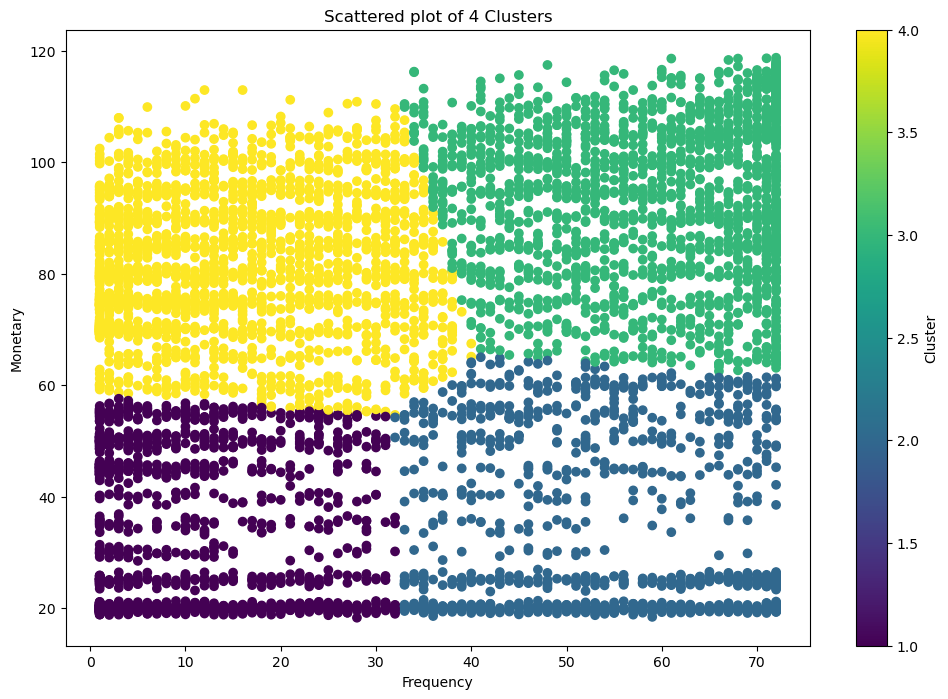

In [675]:
fig, ax = plt.subplots(figsize=(12,8))

rfm_cluster = ax.scatter(df_data['Tenure in Months'], df_data['Monthly Charge'], c=df_data['Cluster'], cmap='viridis')
ax.set(title='Scattered plot of 4 Clusters', xlabel='Frequency', ylabel='Monetary')
plt.colorbar(rfm_cluster, label='Cluster')

## Customer Segmentation Results

In [669]:
df_data.to_csv('customer_seg.csv', index=False)